$Feature$-$Selection$

**Retrival the important features, selecting an important features is very important step before going to ML**

- Droping the constant fetaures ( Regression and classification)

- Information gain (Classification)

- p-value (Regression)

- VIF (Regression)

- Forward selection and backward selection (Regression and classification)

- Correlation with target column ( Regression and classification)

Feature selection methods

1) Variance threshold:
    
    - based on variance we can decide the data is constant or varying
  
    - Data is not varying much means , data has same  values
  
    - For example we have seen in loan dataset, loan term:360
  
    - Python by default will use variance=0, it will drop those fetaures which are having variance=0
  
    - Variance threshold is hyper parameter, we can keep threshold as any value
  
    - based on internal team discussion
  
    - we will drop those fetaure which are having <= threshold value

2) P-value    

    - H0: there is no relation x andy
        
    - H1: There is relation   X and Y
        
    - p<0.05     
    
        - Reject the Null hypothesis:  **Which means do not include the variable**
     
    - p>0.05
  
        - Not Reject the Null hypothesis: **which means include the variables**


3)  Mutual info classify :  
    
    - KNN and entropy

    - It will give the relation between input and output will pick which are having more relation

    - input vs output
    
        - 1) Entropy 
        
        - 2) KNN 
        
        - 3) R-square: explainability about y based on x

4) Forward selection and backward selection
     
     https://courses.lumenlearning.com/introstats1/chapter/model-selection/#:~:text=The%20forward%20selection%20strategy%20is,measured%20by%20adjusted%20R2).

   **Forward selection method**

   - Start with empty set of features

   - Iterate throuh each feature and select the one feature that improves model performance

   - Continue adding fetaures one by one till we meet our creteria

   **Backward selection mehod**

    - Start with full set of features
  
    - Iterate through each feature by removing the feature which is having less impact on the model
  
    - Continue the process, till your performance is stable
  
- Both Forward selection and Bcakward selection methods are complex in nature

- More time taken, will avoid in general
    
5) **Variance inflation factor**(VIF):

    - VIF will give the analysis of multicollinearity

    - In VIF will find the R-Square value of each input feature wrt to other input fetaure

    - Will keep one fetaure as input and  other fetaure are consider as output in Regression equation

    - This will keep on iterate through all fetaure

    - Every feature behave as input as well as output

    - As we know every regression line give Rsqurae value from that value will fine VIF

    - will drop the feature which are having VIF>5 or VIF >10 based on iternal team discussion

   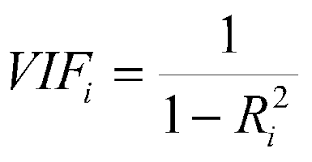

$Method-1$:  Variance threshold method

**Droping constanat fetaures**

- If the features or variables having zero varinace

- variance indicates how data distribution happens

- Constant features have less variance

- by keeping some threshold we can remove those features

- the feature values through out the data is the same

- you can decide manually what is your desired variance in order to keep the feature

In [2]:
import pandas as pd
dict1={'A':[100,200,300,400],
       'B':[1,2,3,4],
       'C':[10,20,30,40],
       'D':[10,10,10,10]}

df=pd.DataFrame(dict1)
df

,A,B,C,D
0,100,1,10,10
1,200,2,20,10
2,300,3,30,10
3,400,4,40,10


In [11]:
import numpy as np
np.var(df['A'])

12500.0

In [2]:
import sklearn
sklearn

<module 'sklearn' from 'C:\\Users\\omkar\\anaconda3\\Lib\\site-packages\\sklearn\\__init__.py'>

In [6]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
# Threshold variance value
# we want to drop the feaure based on threshold
# we are finding the variance so only fit
# transform is not required
vt.fit(df)

VarianceThreshold(threshold=0)

In [ ]:
# fit means calculate some thing
# Transform means modify the data using that calculated value
# Z=x-u/sigma
# fit mean it will calculate u and sigma
# Transform means the calculated u and sigma
# will apply in the formulae and the value will change

In [8]:
dir(vt)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_validate_params',
 'feature_names_in_',
 'fit',
 'fit_tran

In [ ]:
'feature_names_in_',
 'get_feature_names_out',
 'get_params',
 'get_support',
 'n_features_in_',
 'threshold',
 'variances_'

In [42]:
print(vt.feature_names_in_)
print(vt.get_feature_names_out())
print(vt.get_params())
print(vt.get_support())
print(vt.threshold)
print(vt.variances_)

['A' 'B' 'C' 'D']
['A' 'B' 'C']
{'threshold': 0}
[ True  True  True False]
0
[300.     1.25  30.     0.  ]


In [46]:
new_df=df[vt.get_feature_names_out()]
new_df

,A,B,C
0,100,1,10
1,200,2,20
2,300,3,30
3,400,4,40


In [5]:
vt.variances_
# 300 is first column variance (T)
# 1.25 is second column variance (T)
# 30 is column varaince (T)
# 0  is fourth column variance (F)

array([300.  ,   1.25,  30.  ,   0.  ])

In [6]:
vt.get_support()


array([ True,  True,  True, False])

- True means the data column has greater than threshold

- False means the data column has less than threshold

In [7]:
vt.get_params()
# Hyper parameter 
# that we are providing inside the function
# parameters inside the function

{'threshold': 0}

In [8]:
type(vt.get_params())

dict

In [9]:
vt.threshold

0

In [9]:
vt.get_feature_names_out()

array(['A', 'B', 'C'], dtype=object)

In [10]:
cols=vt.get_feature_names_out()
# These fetaure only we want include
df[cols]

,A,B,C
0,100,1,10
1,200,2,20
2,300,3,30
3,400,4,40


In [60]:
df = pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
# # if any one getting every alternative row NaN then use below lines
# df.drop_duplicates(inplace=True)
# df.reset_index(drop=True,inplace=True)
# df=df.iloc[1:,:]
#df.drop('quality',axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


- we alreday know that variance threshold applicable only on input data

- but in classification problems we have output data column also

- Divide the data into two parts

    - Input columns data (X)

    - Output column data (y)

**if I want to get input data**

- 1) I can select only input columns

- 2) or I can simply drop the output column

**if I want get output data**

- 1) I can select only output column

- 2) or I can drop the input column

In [62]:
X=df.drop('quality',axis=1)  # select the input columns
y=df['quality'] # select the output
df.shape,X.shape,y.shape

((1599, 12), (1599, 11), (1599,))

In [64]:
## Apply on wine dataset
## Read the data
## Keep the threshold : 0,0.1
## Get the new data

df = pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\winequality_red.csv")
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
### Make sure before fitting the dataframe , do not include output column
X=df.drop('quality',axis=1) 
# X it self a data frame
vt.fit(X)
vt.variances_
vt.get_support()
cols=vt.get_feature_names_out()
X[cols]




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


- Variance threshold , the threshold value depends on Use case

- Generally we will start with 0.01

- We will check the performance of the model by applying ML algorithms

- Keep on Increase the Threshold to till 0.5

- 0.01,0.1,0.15,0.2,0.25,0.3,0.4,0.5

- Will observe at what threshold value we are getting good model performance



$Method-2$:
    
**Information gain**

mutual info classify


- It is a value estimating how much relationship/how much information about target variable

- We dont want relation between input features

- We want relation between input and output feature

- 0 mean both variables are independent

- Here will use entropy or KNN method  based on joint probability 

- Mutual Info Classify will take input columns data and output columns data

- So from the main data we need to seperate input columns and output column

- In order to seperate the input columns, the best way is drop the output column

    from main dataframe

- We can select the input columns, but every dataframe has different count of input
  coumns

- Selection of inputcolumns is not a good way to seperate the input data

In [ ]:
# we have a data 
# input columns (X) X=x1,x2,x3....
# output column (y)

# Step-1: we will read the data
# Step-2: we will separate input cols and output
# Step-3: Select the input columns by drop the output
#       input cols= drop the output

#       Select the output column 


In [70]:
import pandas as pd

# Read the data
data=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1) # X is dataframe
y=data['quality']   # y is series type

In [72]:
len(data.columns),len(X.columns)

(12, 11)

In [74]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [76]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,y)
MI

array([0.0579486 , 0.11680744, 0.05820906, 0.01977571, 0.02074322,
       0.050167  , 0.08209277, 0.07722742, 0.01826971, 0.12101118,
       0.19431746])

In [78]:
d=pd.DataFrame(MI,
               index=X.columns,
               columns=['MI'])
sorted_data=d.sort_values(by='MI',ascending=False)
sorted_data

,MI
alcohol,0.194317
sulphates,0.121011
volatile acidity,0.116807
total sulfur dioxide,0.082093
density,0.077227
citric acid,0.058209
fixed acidity,0.057949
free sulfur dioxide,0.050167
chlorides,0.020743
residual sugar,0.019776


In [80]:
con=sorted_data['MI']>0.10 
cols=sorted_data[con].index
cols

Index(['alcohol', 'sulphates', 'volatile acidity'], dtype='object')

**How to get Top 5 Columns Manually**

In [82]:
d=pd.DataFrame(MI,
             columns=['Information gain'],
             index=X.columns)
sorted_d=d.sort_values('Information gain',ascending=False)

data[sorted_d.index[:5]]

,alcohol,sulphates,volatile acidity,total sulfur dioxide,density
0,9.4,0.56,0.700,34.0,0.99780
1,9.8,0.68,0.880,67.0,0.99680
2,9.8,0.65,0.760,54.0,0.99700
3,9.8,0.58,0.280,60.0,0.99800
4,9.4,0.56,0.700,34.0,0.99780
...,...,...,...,...,...
1594,10.5,0.58,0.600,44.0,0.99490
1595,11.2,0.76,0.550,51.0,0.99512
1596,11.0,0.75,0.510,40.0,0.99574
1597,10.2,0.71,0.645,44.0,0.99547


In [26]:
#MI ===== DataFrame  pd.DataFrame(MI)
#MI ==== Series      pd.Series(MI)

array([0.05585067, 0.12163268, 0.07803348, 0.03779052, 0.0213518 ,
       0.03547099, 0.04848517, 0.08101109, 0.01653815, 0.12505183,
       0.19831741])

In [29]:
val=pd.Series(MI)
val.index=X.columns
val

fixed acidity           0.055851
volatile acidity        0.121633
citric acid             0.078033
residual sugar          0.037791
chlorides               0.021352
free sulfur dioxide     0.035471
total sulfur dioxide    0.048485
density                 0.081011
pH                      0.016538
sulphates               0.125052
alcohol                 0.198317
dtype: float64

In [19]:
# Two methods almost enough
# Constan features ==== you need to remove
# Mutual information
val=pd.Series(MI)    # index with series
val.index=X.columns  # column with series
val

fixed acidity           0.059164
volatile acidity        0.126759
citric acid             0.053658
residual sugar          0.042133
chlorides               0.053745
free sulfur dioxide     0.005904
total sulfur dioxide    0.089203
density                 0.085153
pH                      0.016547
sulphates               0.092533
alcohol                 0.173353
dtype: float64

In [21]:
val.sort_values(ascending=True)

free sulfur dioxide     0.005904
pH                      0.016547
residual sugar          0.042133
citric acid             0.053658
chlorides               0.053745
fixed acidity           0.059164
density                 0.085153
total sulfur dioxide    0.089203
sulphates               0.092533
volatile acidity        0.126759
alcohol                 0.173353
dtype: float64

<Axes: >

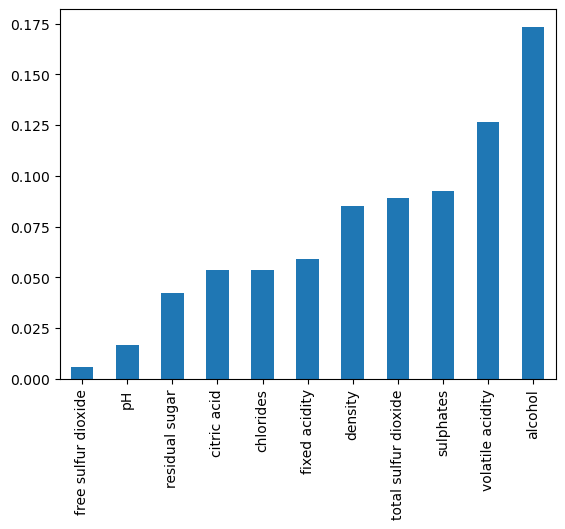

In [22]:
series_mi=val.sort_values(ascending=True)
series_mi.plot(kind='bar')


1. we read the data

2. we sepearted X and y

3. we read the mutual_info_classify

4. we pass the X,y inside the mutual_info_classify

5. we got mutual information values between 
   input columns and output

6. we have total 11 incput columns
   so that we got 11 values

7. We represented with data frame. we
   selected top5

8. we represented with series
   we plot bar chart

is this suitable for both classification and regression sir mutual info

at which step will do these feature selection

why we are splitting : x and y
    
python code will allow X and y sepeartely

thats why we are splitting

ones we extract the important fetaures , those features used to develop a model



$SelectKbest$

In [84]:
data=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\winequality_red.csv")
data.head()               

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- SelectKBest will select the top k columns based on Mutual Information with target columns

- It will take two values 

    - mutual_info_classif

    - How many top columns we want to select k= hyper parameter



- Any feature apply MutualInfoClassify

- If we want to find cat-cat relation then use scoring function as : **chi2**

- If we want to find num-cat relation then use scoring function as: **ANOVA f-test**

In [89]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,f_classif
import pandas as pd

# Read the data
data=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\winequality_red.csv")

#Sepearte input and target features
X=data.drop('quality',axis=1) 
y=data['quality']


top_5=SelectKBest(mutual_info_classif,k=5)
val=top_5.fit(X,y)

#SelectKBest(score_func=chi2,k=5)
#SelectKBest(score_func=f_classif,k=5)

In [34]:
val.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [35]:
val.get_feature_names_out()

array(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'], dtype=object)

In [36]:
val.get_params()  #

{'k': 5,
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [37]:
val.scores_

array([0.04741694, 0.10302697, 0.06299412, 0.0234198 , 0.01830609,
       0.02310948, 0.08042133, 0.07828394, 0.02675428, 0.11274891,
       0.18200873])

**Method-3**

$p-value$

In [27]:
############## All together ##############
#Step-1: Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

# Step-5: Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)


from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6888.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):                        0.00
Time:                        22:14:07   Log-Likelihood:                         -1114.5
No. Observations:                1119   AIC:                                      2253.
Df Residuals:                    1107   BIC:                                      2313.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
index                -5.673e-05   4.81e-05     -1.180      0.238      -0.000    3.76e-05
fixed acidity            0.0079      0.021      0.383      0.701      -0.033       0.048
volatile acidity        -1.1899      0.142     -8.356      0.000      -1.469      -0.910
citric acid             -0.2576      0.178     -1.445      0.149      -0.607       0.092
residual sugar          -0.0027      0.014     -0.189      0.850      -0.031       0.025
chlorides               -1.5908      0.495     -3.217      0.001      -2.561      -0.620
free sulfur dioxide      0.0074      0.003      2.731      0.006       0.002       0.013
total sulfur dioxide    -0.0043      0.001     -4.413      0.000      -0.006      -0.002
density                  4.4695      0.780      5.727      0.000       2.938       6.001
pH                      -0.5425      0.198     -2.735      0.006      -0.932      -0.153
sulphates                0.9274      0.133      6.965      0.000       0.666       1.189
alcohol                  0.3140      0.022     14.165      0.000       0.270       0.357
==============================================================================
Omnibus:                       13.424   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.573
Skew:                          -0.167   Prob(JB):                     0.000252
Kurtosis:                       3.494   Cond. No.                     3.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Based on alpha= 0.05

- We will reject 3 columns: Fixed acidity,Citric acid, Residual sugar

- Again we need to build the model by using other features

**Method-4**

$VIF$

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'X1': np.random.randn(100),
    'X2': np.random.randn(100),
    'X3': np.random.randn(100)
}

df = pd.DataFrame(data)

# Adding a multicollinear variable
df['X4'] = 2*df['X1'] + 3*df['X2'] + np.random.normal(0, 0.1, 100)

# Fit a multiple regression model
X = df[['X1', 'X2', 'X3', 'X4']]
y = np.random.randn(100)
model = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


  feature          VIF
0      X1   504.665288
1      X2  1072.965814
2      X3     1.015390
3      X4  1483.290141


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8655
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.488
Time:                        22:18:37   Log-Likelihood:                -136.49
No. Observations:                 100   AIC:                             283.0
Df Residuals:                      95   BIC:                             296.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0629      0.098     -0.642      0.522      -0.257       0.132
X1            -2.2177      2.025     -1.095      0.276      -6.238       1.802
X2            -3.5370      3.023     -1.170      0.245      -9.539       2.464
X3             0.0046      0.102      0.045      0.964      -0.199       0.208
X4             1.1709      1.013      1.156      0.251      -0.840       3.181
==============================================================================
Omnibus:                        0.620   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.295
Skew:                           0.112   Prob(JB):                        0.863
Kurtosis:                       3.144   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

In [32]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature          VIF
0                  index     5.054246
1          fixed acidity    80.338968
2       volatile acidity    17.065205
3            citric acid     9.197695
4         residual sugar     4.663513
5              chlorides     6.573395
6    free sulfur dioxide     6.781651
7   total sulfur dioxide     6.916574
8                density  1551.937829
9                     pH  1109.622836
10             sulphates    21.844623
11               alcohol   130.707581
